<a href="https://colab.research.google.com/github/turtulin/Research_Methodology/blob/dev/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Configure Google Collab.**




In Google Collab, click on Edit > Notebook Settings > Under Hardware Accelator, choose GPU.

# **2) Upload the dataset to the collab workspace.**

Upload the dataset to your google drive and then mount the drive to the collab workspace or you can directly upload the file directly to google collab.

Dataset available publicly [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) on kaggle.

# **3) Import packages.**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression

# **4) Data preparation.**

In [3]:
# Load CSV file
data = pd.read_csv('/content/diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#total rows and columns (rows,columns)
data.shape

(768, 9)

In [5]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

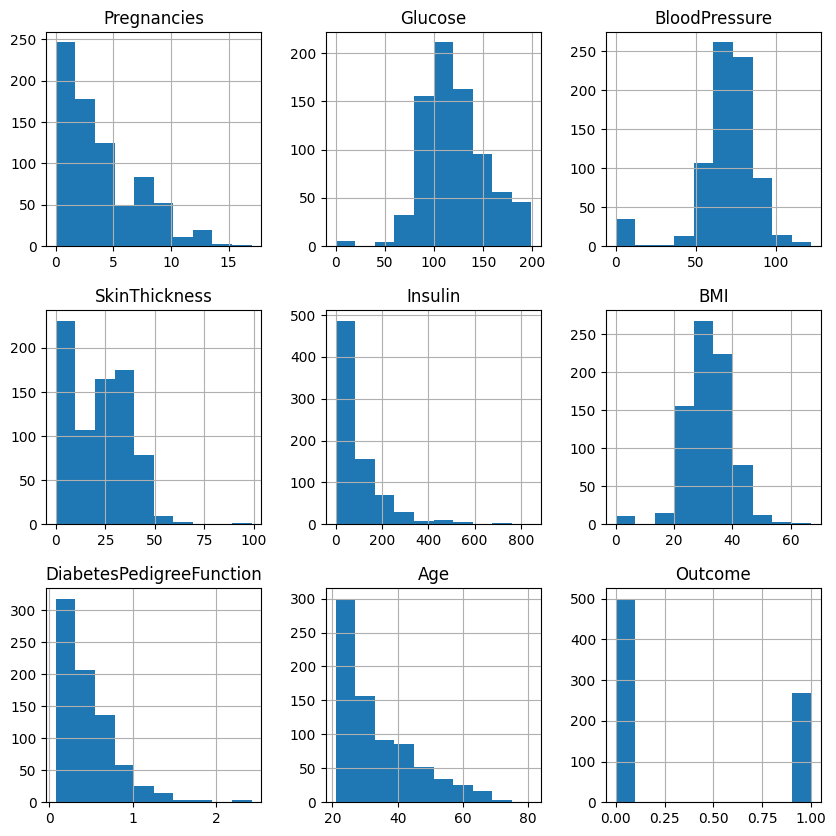

In [6]:
data.hist(bins=10,figsize=(10,10))

Based on domain knowledge, dimensions such as Glucose, BloodPressure, Skinthickness, Insulin, BMI cannot be 0.

In [7]:
#number of rows in which these columns were 0.
print('Blood Pressure : ',data[data['BloodPressure']==0].shape[0])
print('Glucose : ',data[data['Glucose']==0].shape[0])
print('Skin Thickness : ',data[data['SkinThickness']==0].shape[0])
print('Insulin : ',data[data['Insulin']==0].shape[0])
print('BMI : ',data[data['BMI']==0].shape[0])

Blood Pressure :  35
Glucose :  5
Skin Thickness :  227
Insulin :  374
BMI :  11


In [8]:
#Process rows with values 0 for the columns that cant be zero.
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())
data['BMI']=data['BMI'].replace(0,data['BMI'].median())

**Normalize and standardize the data.**

In [9]:
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

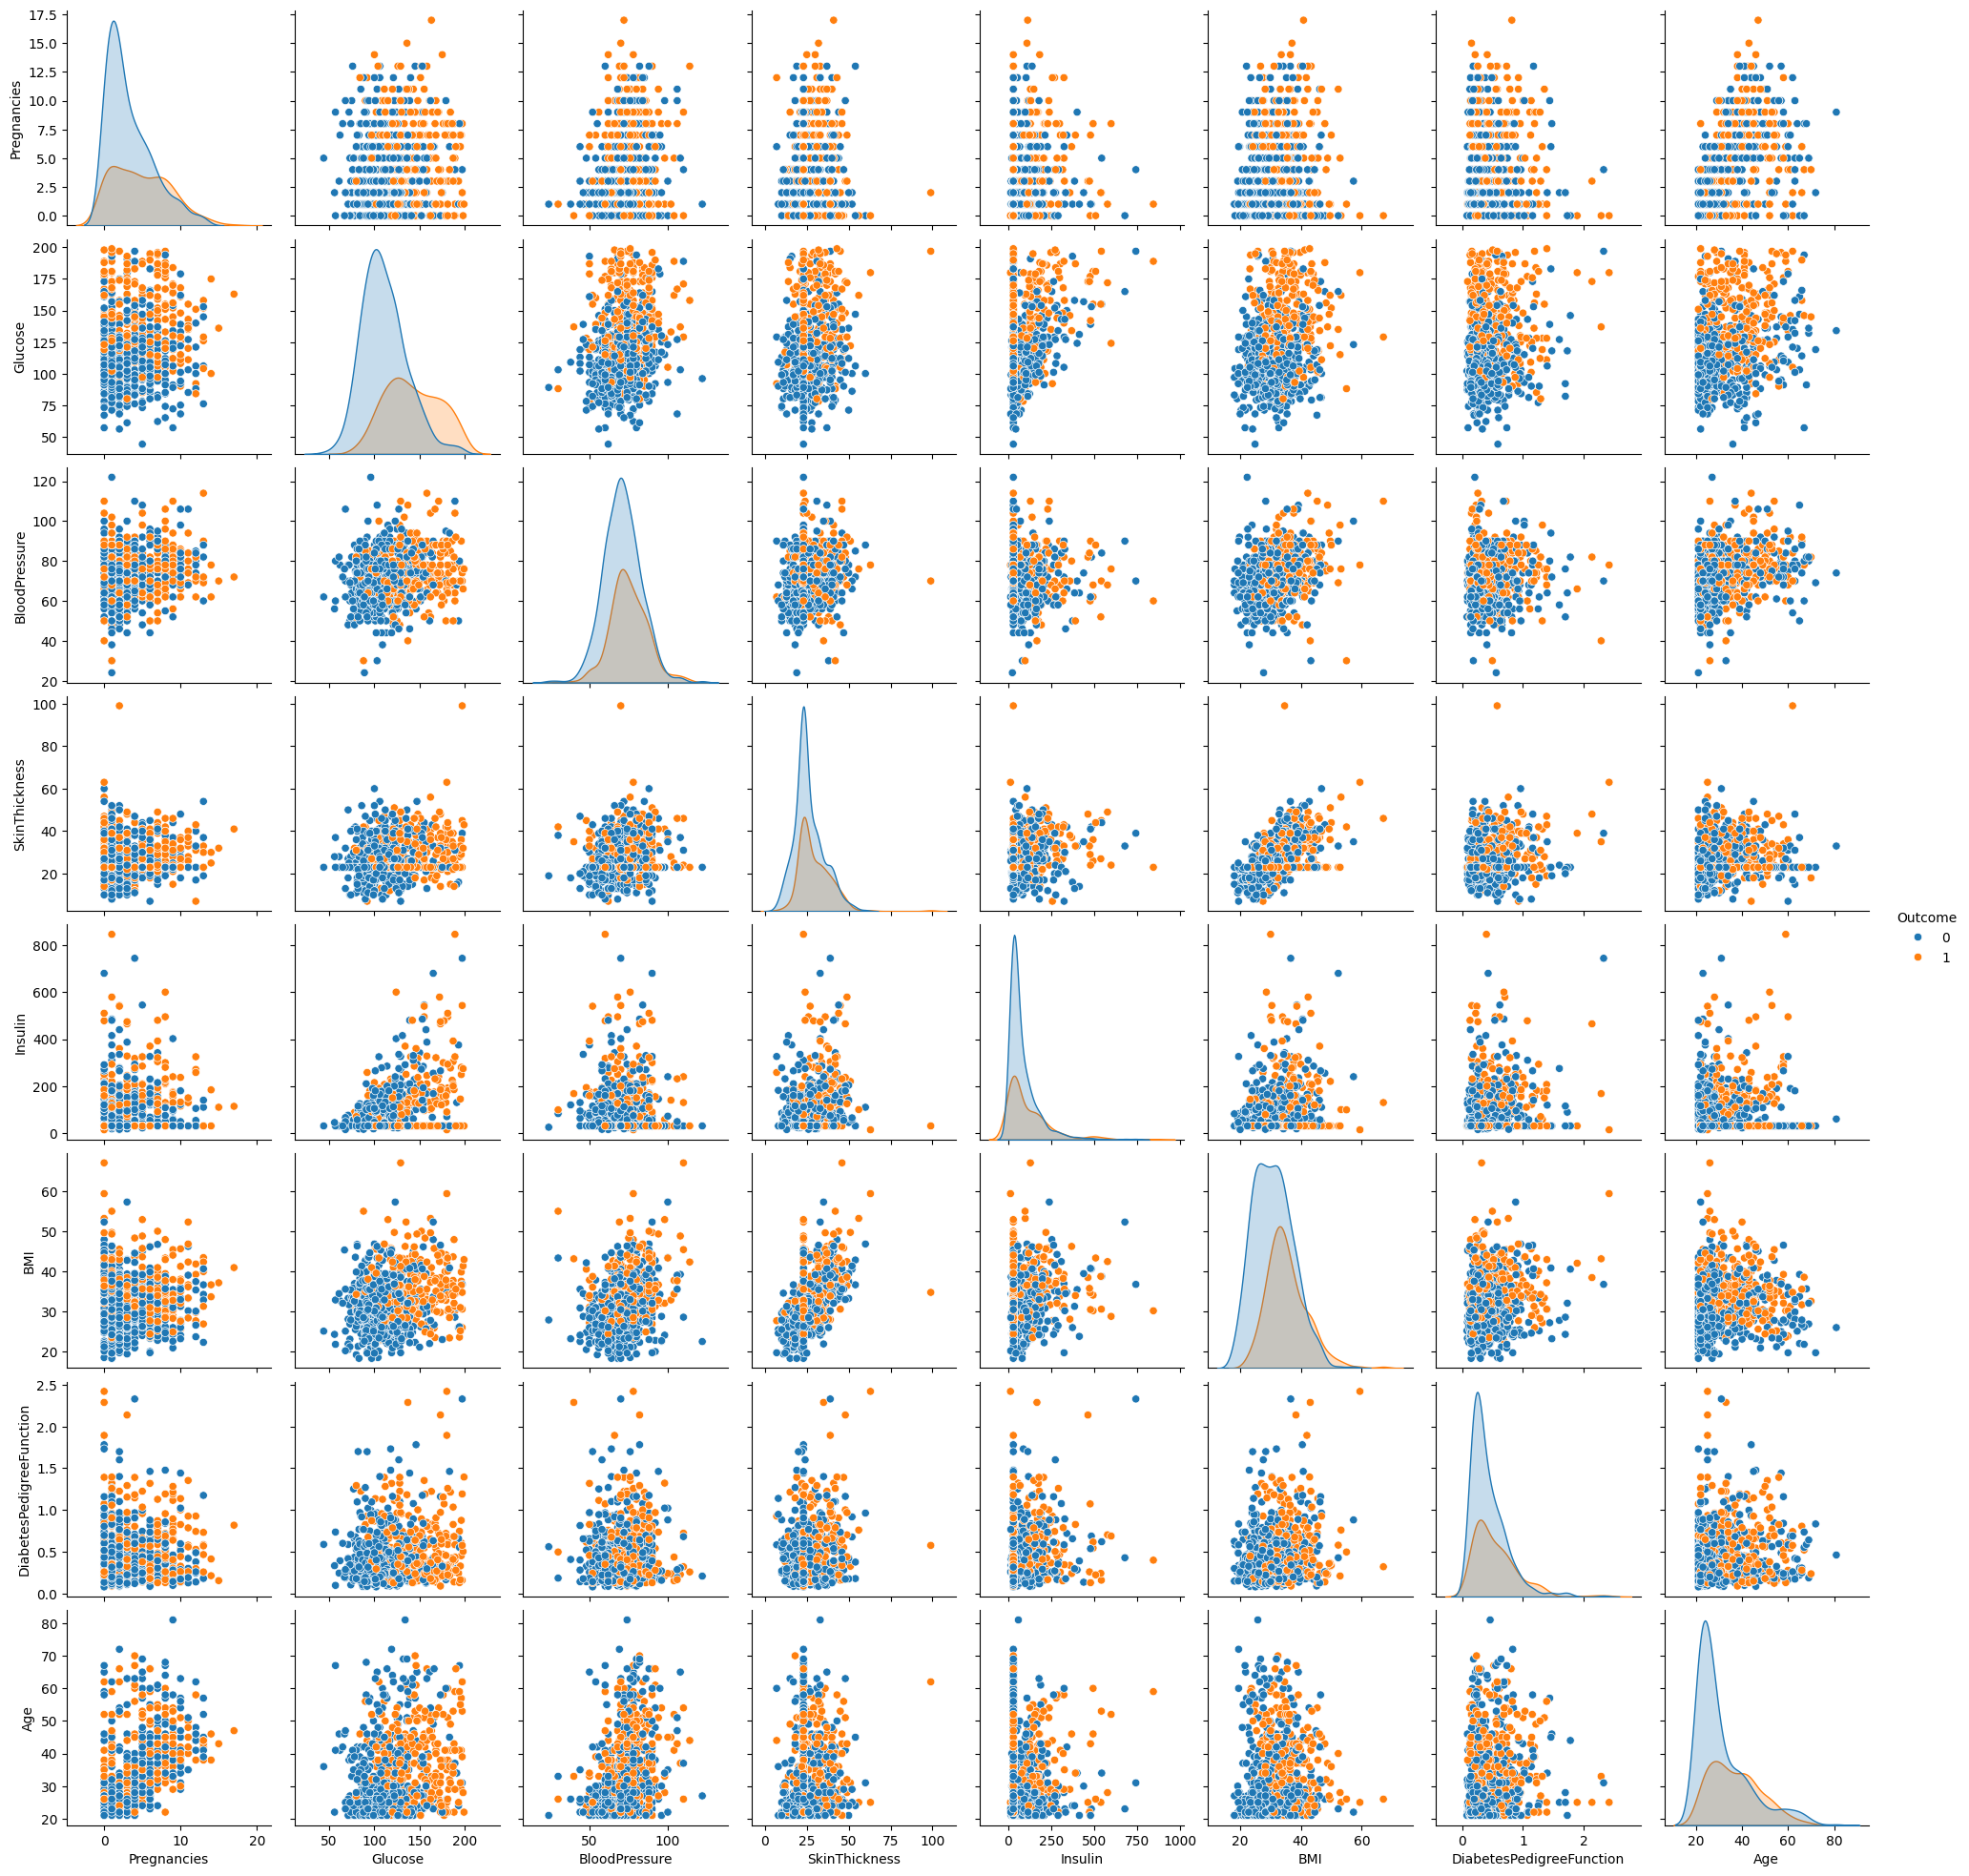

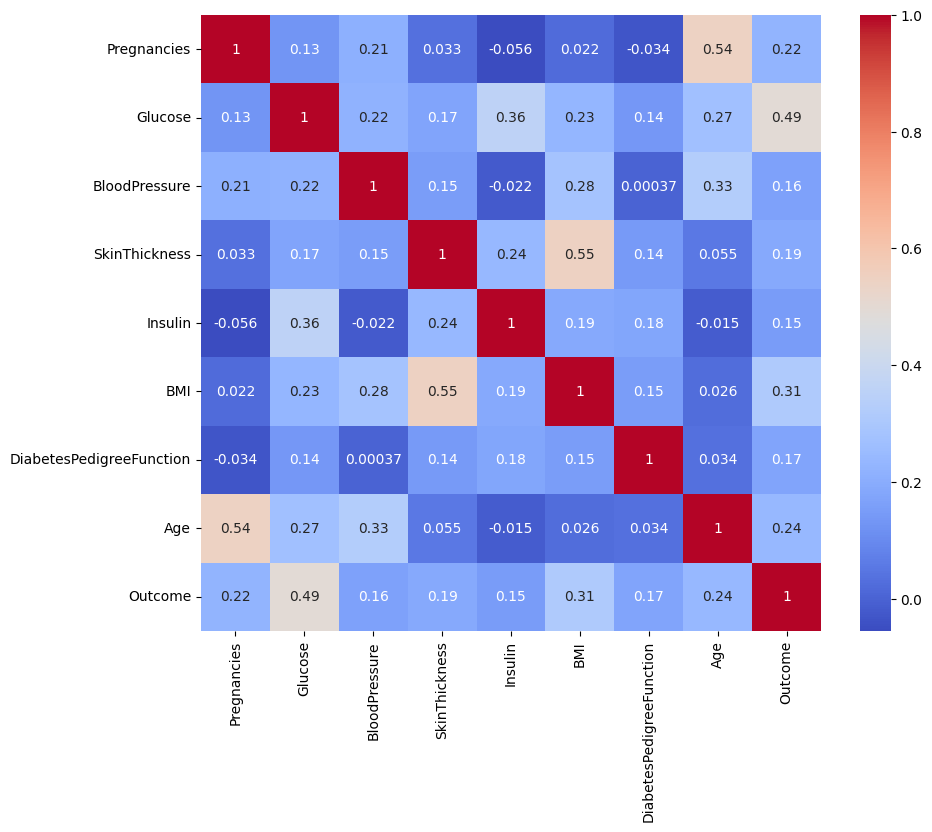

In [10]:
# Pairplot to see relationships
sns.pairplot(data, hue='Outcome')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **5) Develop the model.**

In [11]:
# Define the model
model = LogisticRegression()

# Define the cross-validation method (e.g., 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# **6) Evaluate the model.**

In [12]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_scores = cross_validate(model, X_scaled, y, cv=kf, scoring=scoring)

# Print the cross-validation scores
print(f'Cross-Validation Accuracy: {cv_scores["test_accuracy"]}')
print(f'Mean CV Accuracy: {cv_scores["test_accuracy"].mean()}')

print(f'Cross-Validation Precision: {cv_scores["test_precision"]}')
print(f'Mean CV Precision: {cv_scores["test_precision"].mean()}')

print(f'Cross-Validation Recall: {cv_scores["test_recall"]}')
print(f'Mean CV Recall: {cv_scores["test_recall"].mean()}')

print(f'Cross-Validation F1 Score: {cv_scores["test_f1"]}')
print(f'Mean CV F1 Score: {cv_scores["test_f1"].mean()}')

print(f'Cross-Validation ROC AUC Score: {cv_scores["test_roc_auc"]}')
print(f'Mean CV ROC AUC Score: {cv_scores["test_roc_auc"].mean()}')

Cross-Validation Accuracy: [0.76623377 0.78571429 0.73376623 0.79738562 0.75816993]
Mean CV Accuracy: 0.7682539682539682
Cross-Validation Precision: [0.67924528 0.66666667 0.76315789 0.72222222 0.75609756]
Mean CV Precision: 0.7174779255240418
Cross-Validation Recall: [0.65454545 0.59574468 0.47540984 0.55319149 0.53448276]
Mean CV Recall: 0.5626748438888968
Cross-Validation F1 Score: [0.66666667 0.62921348 0.58585859 0.62650602 0.62626263]
Mean CV F1 Score: 0.6269014772060664
Cross-Validation ROC AUC Score: [0.81928375 0.8258103  0.81773312 0.86150141 0.84646098]
Mean CV ROC AUC Score: 0.8341579107429047
